#### COMPANION WORKBOOK

# Complexity Overload

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Decision Trees: A New Paradigm

In [16]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('./simulated_data.csv')
df.head()

,Unnamed: 0,x,y
0,0,0.000000,0.086260
1,1,0.063467,0.881165
2,2,0.126933,0.145261
3,3,0.190400,-0.252824
4,4,0.253866,-0.320448


In [3]:
def fit_and_plot_model(df, model):
    # Splits input features from target variable
    features = df.drop('y', axis=1)
    target = df.y
    
    # Fits the model
    model.fit(features, target)
    
    # Plots the dataset
    plt.scatter(df.x, df.y)
    
    # Overlays the predicted values for y
    plt.plot(df.x, model.predict(features), 'k--')
    
    # Returns fitted model
    return model

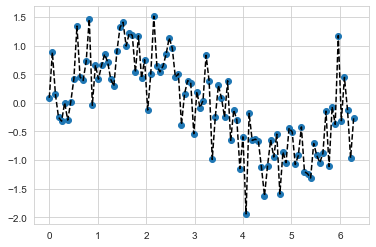

In [4]:
# Unconstrained Decision Tree
model = fit_and_plot_model(df, DecisionTreeRegressor())

In [5]:
# Original values of y
actual_y = df.y

# Predicted values of y
predicted_y = model.predict(df.drop('y', axis=1))

# Total difference between actual and predicted values of y
np.sum( np.absolute( actual_y - predicted_y ) )

0.0

## II. Understanding Tree Structure

In [5]:
# Exports the tree structure
from sklearn.tree import export_graphviz

# Allows us to render the diagram in Jupyter notebook
from graphviz import Source
from IPython.display import Image

In [6]:
def plot_and_save_decision_tree(model):
    # Export tree structure and save to Source object
    graph = Source( export_graphviz(model, out_file=None) )

    # Pipe to PNG bytes
    tree_png = graph.pipe(format='png')

    # Display image
    return Image(tree_png)

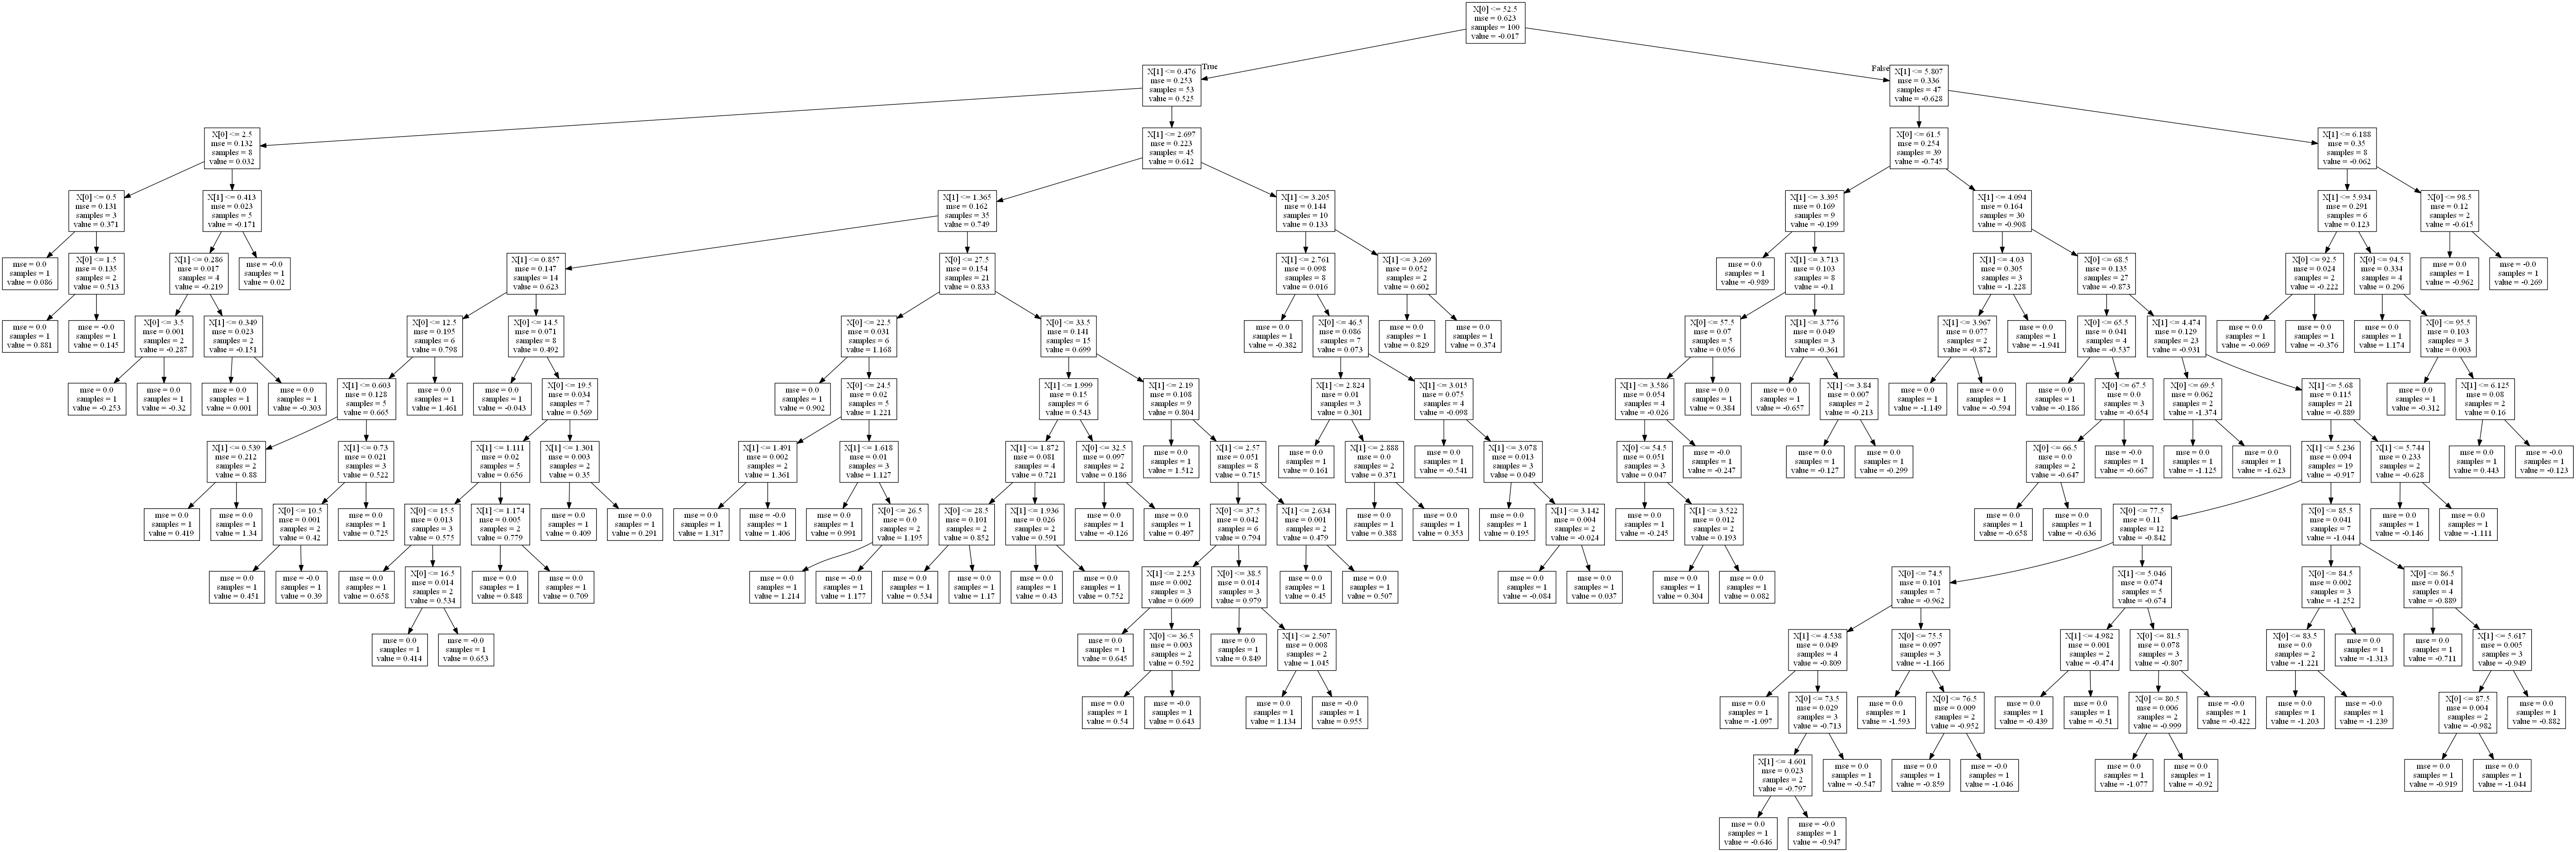

In [14]:
plot_and_save_decision_tree(model)

In [17]:
model.tree_.children_left

array([  1,   2,   3,   4,  -1,   6,  -1,  -1,   9,  10,  11,  -1,  -1,
        14,  -1,  -1,  -1,  18,  19,  20,  21,  22,  23,  -1,  -1,  26,
        27,  -1,  -1,  -1,  -1,  32,  -1,  34,  35,  36,  -1,  38,  -1,
        -1,  41,  -1,  -1,  44,  -1,  -1,  47,  48,  -1,  50,  51,  -1,
        -1,  54,  -1,  56,  -1,  -1,  59,  60,  61,  62,  -1,  -1,  65,
        -1,  -1,  68,  -1,  -1,  71,  -1,  73,  74,  75,  -1,  77,  -1,
        -1,  80,  -1,  82,  -1,  -1,  85,  -1,  -1,  88,  89,  -1,  91,
        92,  -1,  94,  -1,  -1,  97,  -1,  99,  -1, 101,  -1,  -1, 104,
        -1,  -1, 107, 108, 109,  -1, 111, 112, 113, 114,  -1, 116,  -1,
        -1,  -1,  -1, 121,  -1, 123,  -1,  -1, 126, 127, 128,  -1,  -1,
        -1, 132, 133,  -1, 135, 136,  -1,  -1,  -1, 140, 141,  -1,  -1,
       144, 145, 146, 147, 148,  -1, 150, 151,  -1,  -1,  -1, 155,  -1,
       157,  -1,  -1, 160, 161,  -1,  -1, 164, 165,  -1,  -1,  -1, 169,
       170, 171,  -1,  -1,  -1, 175,  -1, 177, 178,  -1,  -1,  -

In [18]:
model.tree_.children_right

array([106,  17,   8,   5,  -1,   7,  -1,  -1,  16,  13,  12,  -1,  -1,
        15,  -1,  -1,  -1,  87,  46,  31,  30,  25,  24,  -1,  -1,  29,
        28,  -1,  -1,  -1,  -1,  33,  -1,  43,  40,  37,  -1,  39,  -1,
        -1,  42,  -1,  -1,  45,  -1,  -1,  58,  49,  -1,  53,  52,  -1,
        -1,  55,  -1,  57,  -1,  -1,  70,  67,  64,  63,  -1,  -1,  66,
        -1,  -1,  69,  -1,  -1,  72,  -1,  84,  79,  76,  -1,  78,  -1,
        -1,  81,  -1,  83,  -1,  -1,  86,  -1,  -1, 103,  90,  -1,  96,
        93,  -1,  95,  -1,  -1,  98,  -1, 100,  -1, 102,  -1,  -1, 105,
        -1,  -1, 184, 125, 110,  -1, 120, 119, 118, 115,  -1, 117,  -1,
        -1,  -1,  -1, 122,  -1, 124,  -1,  -1, 131, 130, 129,  -1,  -1,
        -1, 139, 134,  -1, 138, 137,  -1,  -1,  -1, 143, 142,  -1,  -1,
       181, 168, 159, 154, 149,  -1, 153, 152,  -1,  -1,  -1, 156,  -1,
       158,  -1,  -1, 163, 162,  -1,  -1, 167, 166,  -1,  -1,  -1, 174,
       173, 172,  -1,  -1,  -1, 176,  -1, 180, 179,  -1,  -1,  -

In [16]:
# Node count
print(model.tree_.node_count)

# Should be 199 (one value for each node)
print( len( model.tree_.children_left ) )
print( len( model.tree_.children_right) )

# Total number of leaf nodes
print( np.sum( model.tree_.children_left == -1 ) )
print( np.sum( model.tree_.children_right == -1 ) )

199
199
199
100
100


## III. Constrained Decision Trees

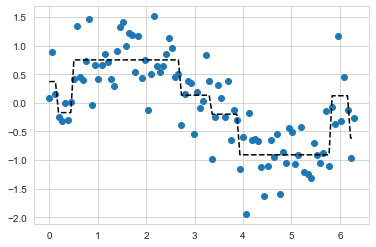

In [19]:
# Depth-Constrained Decision Tree
model2 = fit_and_plot_model(df, DecisionTreeRegressor(max_depth = 3))

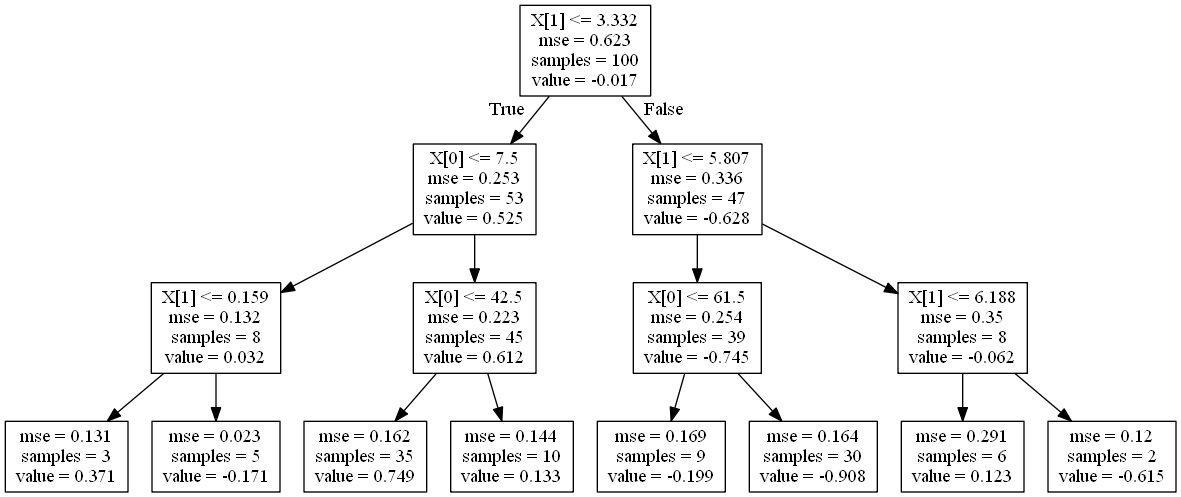

In [20]:
plot_and_save_decision_tree(model2)

## IV. Random Forests


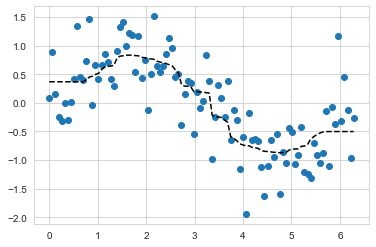

In [30]:
from sklearn.ensemble import RandomForestRegressor

random_forest = fit_and_plot_model(df, RandomForestRegressor(random_state=123, min_samples_leaf=10))

In [22]:
print(len(random_forest.estimators_))

100


#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

#### First, remember to import the relevant libraries and set the theme (if you haven't done so already).

#### Next, remember to copy over the <code>fit_and_plot_model()</code> helper function (if you haven't done so already).

#### Finally, check that you have the <code>plot_and_save_decision_tree()</code> helper function from the Coding Section.

## <span style="color:RoyalBlue">Exercise 4.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) Import <code>'simulated_data.csv'</code> and display the first 5 observations.

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>0.086260</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>0.881165</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.145261</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>-0.252824</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>-0.320448</td>
    </tr>
  </tbody>
</table>

#### B.) Fit and plot a constrained decision tree on the dataset that as at minimum 10 observations per leaf.
* What can you conclude about the model? Is it what you expected?

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="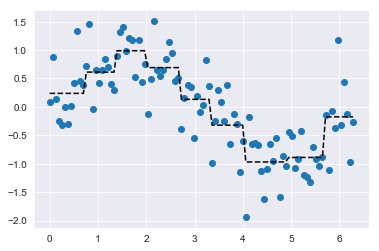&#10;">

#### C.) Display the structure of the tree using graphviz.

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="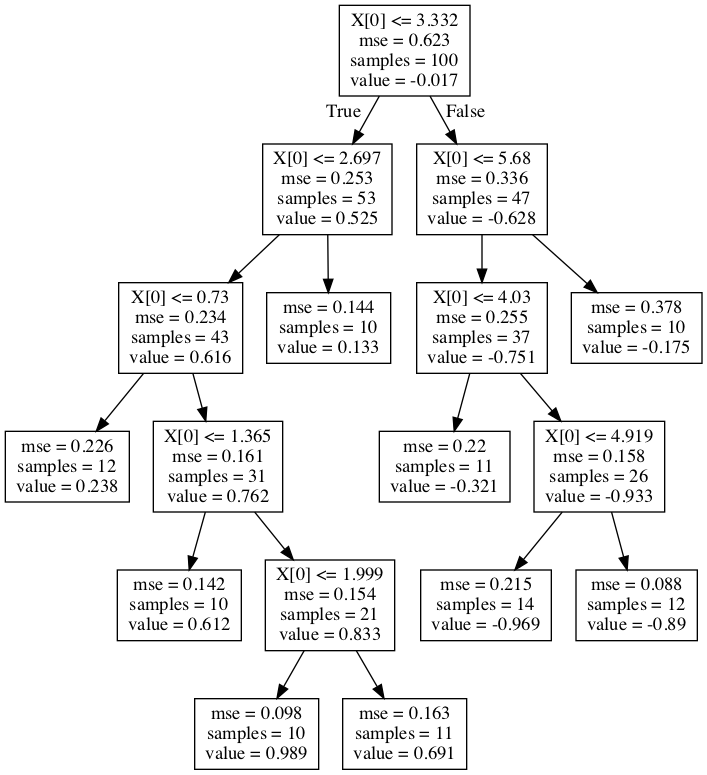&#10;">

## <span style="color:RoyalBlue">Exercise 4.2 - Decision Paths</span>

Let's continue with the decision tree you fitted and plotted in the previous exercise.

Within each **non-leaf node**, the first value indicates the split. For example, in the tree above, the very first split occurs at $x \leq 3.332$. In other words, you would follow the left branch if your observation were less than or equal to 3.332.

Within each **leaf**, the last value indicates the predicted value based on the decision path leading up to that leaf.

#### For example, let's say you had an observation $x = 3.5$ and you wanted to predict its corresponding $y$ value, or $\hat{y} = f(x) = f(3.5)$ where $f(x)$ represents the decision tree from Exercise 4.1 Part (C). Here's how that would work:

1. Split \#1: $x \leq 3.332$? **FALSE** - Go down the branch on the RIGHT.
2. Split \#2: $x \leq 5.68$? **TRUE** - Go down the branch on the LEFT.
3. Split \#3: $x \leq 4.03$? **TRUE** - Go down the branch on the LEFT.
4. Arrive at leaf node - Prediction is: **-0.321**.

#### A.) Based on the plot from Exercise 4.1 Part (B), confirm for yourself that the predicted value for $x = 3.5$ indeed appears to be roughly -0.321.

#### B.) Using the decision tree model object from Exercise 4.1 Part (B), confirm our logic above is correct by calling the <code>predict()</code> function for $x=3.5$.
* **Tip:** When you wish to predict a SINGLE observation, you need to reshape the sample. First, you should create a NumPy array from the observation:

<pre style="color:steelblue">
X = <strong>np.array([3.5])</strong>.reshape(-1, 1)
</pre>

* Then you should reshape it like so:

<pre style="color:steelblue">
X = np.array([3.5])<strong>.reshape(-1, 1)</strong>
</pre>

* This is because the model expects a 2-dimensional shape for your input features (even if you only have 1 input feature). We will explore this concept more in the next exercise and take a look at what's going on under the hood, but for now, take our word for it.

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[-0.32142401]
</pre>

#### C.) Based on the tree structure from Exercise 4.1 Part (C), what's the decision path for predicting an observation for $x=1.2$? What's the final prediction?

1. Split \#1: $x \leq 3.332$? **TRUE** - Go down the branch on the LEFT.
2. Split \#2: $x \leq 2.697$? **TRUE** - Go down the branch on the LEFT.
3. Split \#3: $x \leq 0.73$? **FALSE** - Go down the branch on the RIGHT.
4. Split \#4: $x \leq 1.365$? **TRUE** - Go down the branch on the LEFT.
5. Arrive at leaf node - Prediction is: **0.612**.

#### D.) Using your model, confirm your prediction for $x = 1.2$.
* Remember to reshape your input.

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[0.61238014]
</pre>

## <span style="color:RoyalBlue">Exercise 4.3 - Input Dimensions</span>

After you train a model with Scikit-Learn, if you want to use it to predict new observations/samples, you'll need to remember that the model will accept EITHER a **Pandas DataFrame** OR a **2-Dimensional NumPy Array**. (In fact, under the hood, Scikit-Learn actually converts a Pandas DataFrame into a 2-Dimensional NumPy Array first!)

The key word there is **2-Dimensional**. The first dimension represents the "rows" or individual observations of your dataset. The second dimension represents the "columns" or input features of your dataset. Even if you only have one input feature (like we do in this simulation), the model will still expect a 2-dimensional array.

#### For example...
* If you have 1 observation and 1 input feature, you'll need a $1 \times 1$ array.
* If you have 100 observations and 1 input feature, you'll need a $100 \times 1$ array.
* If you have 1 observation and 5 input features, you'll need a $1 \times 5$ array.
* If you have 100 observation and 5 input features, you'll need a $100 \times 5$ array.

#### A.) First, display the <code>.shape</code> of <code>np.array([3.5])</code>.
* Notice how it only has a single dimension!

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(1,)
</pre>

#### B.) Next, display the <code>.shape</code> of <code>np.array([3.5]).reshape(-1, 1)</code>.
* Notice how there are now two dimension values!
* When you call <code>.reshape(-1, 1)</code>, the **-1 means that the first dimension should be inferred** while the second dimension should be 1. In other words, <code>.reshape(-1, 1)</code> says "give me an $n \times 1$" array.

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(1, 1)
</pre>

#### C.) Next, display the <code>.shape</code> of a NumPy array with three values: 1.2, 2.7, and 3.5. In other words, this is the array we'd need if we wanted to predict values for those 3 observations at once.
* What you think the output would be?
* Notice how it still only has a single dimension, despite having 3 *elements*!

In [14]:
import numpy as np

arr = np.array([1,2,3])
print(arr.shape)
print(arr)

arr = arr.reshape(-1,1)
print(arr.shape)
print(arr)

(3,)
[1 2 3]
(3, 1)
[[1]
 [2]
 [3]]


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(3,)
</pre>

#### Next, reshape it into a $3 \times 1$ array and display its new shape.
* Do you see how there are 2 dimension values now?

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(3,)
</pre>

#### D.) Finally, use the same decision tree model from Exercise 4.1 and Exercise 4.2 to predict values for $x = 1.2$, $x = 2.7$, and $x = 3.5$ simultaneously.
* Tip: You already saw the predicted values for $x = 1.2$ and $x = 3.5$ in the previous exercise. Do these outputs match?

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[ 0.61238014  0.13305939 -0.32142401]
</pre>

## <span style="color:RoyalBlue">Exercise 4.4 - Noisy Tangent vs. Decision Trees</span>

Finally, just as in the previous modules' workbooks, let's revisit the noisy tangent simulated dataset. Let's replicate the decision tree and random forest models from this module on our noisy tangent dataset.

#### A.) First, read in the <code>'simulated_tangent_data.csv'</code> you saved from earlier into a <code>tangent_df</code> dataframe. Then display the first 5 rows for a quick sanity check.

In [40]:
tangent_df = pd.read_csv('./tangent_df.csv')
tangent_df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881293
2,0.126933,0.146287
3,0.190400,-0.249341
4,0.253866,-0.312132


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>0.086260</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>0.881293</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.146287</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>-0.249341</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>-0.312132</td>
    </tr>
  </tbody>
</table>

#### B.) Next, fit and plot an unconstrained decision tree on the noisy tangent dataset.
* Tip: You already have the helper function(s) needed for this.
* Set the y-axis limits to be from -5 to 5. (Tip: You can do this *after* calling your helper function. You don't need to modify your helper function.)
* Is the unconstrained decision tree overfit?

In [41]:
features = tangent_df.drop('y', axis=1)
target = tangent_df.y

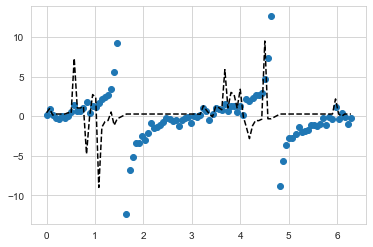

In [50]:
from sklearn.ensemble import RandomForestRegressor

rfm = RandomForestRegressor(random_state=123, max_depth=7)
rfm.fit(features, target)

plt.scatter(tangent_df.x, tangent_df.y)
plt.plot(features, rfm.predict(np.array(target).reshape(-1, 1)), 'k--')
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="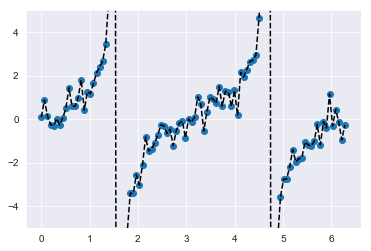&#10;">

#### C.) Fit and plot a constrained decision tree with a max depth of 3.
* What do you notice about it? Is this one overfit or underfit?

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="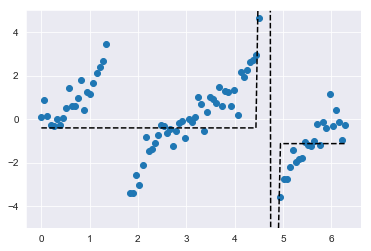&#10;">

#### D.) Fit and plot a constrained decision tree with a max depth of 7.
* Compared to the previous one with max depth of 3, do you think this model is better or worse? What do you think this says about the appropriate level of complexity for a decision tree on the noisy tangent dataset?

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="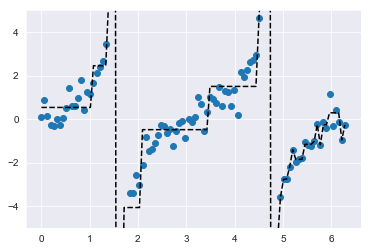&#10;">

#### E.) Fit and plot a constrained decision tree with a mininum leaf size of 5.
* What do you notice about it? Is this one overfit or underfit?

#### F.) If you decrease the minimum leaf size to 3, what do you think will happen the model? Do you think complexity / flexibility will go up or down? What about if you increase the minimum leaf size to 10? Fit and plot them to confirm.

## <span style="color:RoyalBlue">Exercise 4.5 - Noisy Tangent vs. Random Forests</span>

Let's move onto random forests. Remember, these ensemble methods have the practical result of "smoothing" out predictions.
#### A.) Fit and plot an unconstrained random forest with <code>random_state</code> set to 123.
* Remember to set the y-axis limits to be from -5 to 5.
* Compared to the unconstrained decision tree, do you think this model is more or less overfit?

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="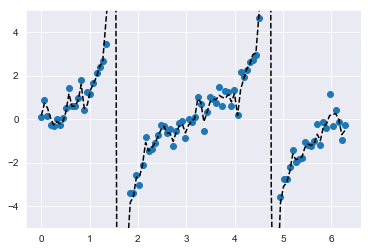&#10;">

*Compared to the unconstrained decision tree, this model appears to be slightly less overfit, albeit still overfit overall.*

#### B.) Fit and plot a constrained random forest with max depth of 7 and <code>random_state</code> set to 123.
* Compare this to the constrained decision tree with max depth of 7.

#### C.) Fit and plot a constrained random forest with minimum leaf size of 5 and <code>random_state</code> set to 123.
* Compare this to the constrained decision tree with minimum leaf size of 5.

#### D.) Based on the results from this workbook and the previous one, do you think these tree-based models or the polynomial models from the previous module will work better overall for the noisy tangent dataset? What about the noisy sine dataset? Why?
* Write down your thoughts and we'll revisit this topic in the next module!